# 一次変換と matplotlib

線形写像について、また、複素平面について、
プログラムを通じて勉強しましょう。


行列 A が与えられた時に、$det(A - \lambda I) = 0$ となる $\lambda$ のことを固有値、それぞれの $\lambda$ に対して、
$A \vec x = \lambda \vec x$ となる $x$ のことを固有値 $\lambda$ の固有ベクトルといいます。numpy には、linalg.eig という，固有値と固有ベクトルを返してくれる関数があります。この関数は、(固有値のベクトル, 
固有ベクトルを並べてできた行列(各列が固有ベクトル))というタプルを返します。ですので、2 つの変数のペアで返値を受け取れば，それぞれをとってこれます。

In [13]:
import numpy as np
#a = np.reshape(range(4), (2,2))
a = np.array([[1,0],[-0.5,1]])
e, v = np.linalg.eig(a)
print(e)
print(v)

[1. 1.]
[[0.0000000e+00 4.4408921e-16]
 [1.0000000e+00 1.0000000e+00]]


v は，固有ベクトルのリストではなく，v の各列が固有ベクトルだということに注意してください。

** 練習問題 **
2 次元の場合で、固有値、固有ベクトルを計算するプログラムを自分でも書いてみよう。高次元になると、方程式が高次になるので、数式処理を行い，ニュートン法などで方程式を解くなどのことを考える必要があります。

固有値，固有ベクトルの意味を考えるために，画像に対する，これらの変換による一時変換を考えてみましょう。

Python では、画像処理に、Pillow (PIL) パッケージが広く使われています。
画像を表示するだけなら、PIL パッケージに属する Image モジュールを用いて、次のようにして簡単にできます。
この import 文で、これ以降、このモジュールが Image という名前でアクセスできます。
Image.open により、画像ファイルに対応した Image オブジェクトが作られます。このオブジェクトは、
show メソッドでウィンドウを開いて表示できます。

In [16]:
import PIL.Image as Image

im = Image.open("./logo.png")
im.show()

PIL モジュールには、ImageDraw モジュールもあり、Image に対する描画ができます。ImageDraw.Draw 関数で返されるのは、
この画像に対する描画を担当する ImageDraw クラスのオブジェクトで、それに対して line などのメソッドを呼び出すことに
より、描画ができます。line は、第1引数でリストとして座標が与えられた2点を結ぶ線をひくものです。クラスやオブジェクトについての説明は、次回にまわします。

In [17]:
from PIL import Image,ImageDraw

im = Image.open("./logo.png")
draw = ImageDraw.Draw(im)
w, h = im.size  # 500x 500のはず
for i in (list(range(0, 500, 125)) + [499]):  
                # range には + はできないので、list に一旦変換
    draw.line([i,0,i,500],fill="black",width=3)
    draw.line([0,i,500,i],fill="black",width=3)
im.show()

さらに、im を、np.asarray でピクセルの配列に変換し，
matplotlib で表示しましょう。


(500, 500, 4)


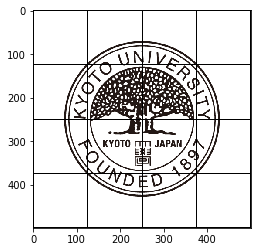

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

imarray = np.asarray(im)

#imarray は，画像のサイズ x 4 の rgba の配列
print(imarray.shape)

plt.imshow(imarray, aspect="equal")
plt.show()

これからの処理のために、x, y の座標が[0,500]x[0,500] ではなく，[-1,1]x[-1,1] 上の画像となるようにしましょう。
白黒画像なので，[-1,1]x[-1,1]　の点の集まりとなるようにします。

imarray の shape を見ればわかるように、imarray は(500,500,4) の3次元配列です。
imarray(x,y,a) は，各点の色の a 成分 (a = 0,1,2,3 は，x, y, z, alpha) を表しています。
a = 0, すなわち，r 成分だけとってきた2次元配列を fst としましょう。
そして，fst(x,y) が 0 でない点の座標 (x, y) だけを取り出して，それを
[-1,1]x[-1,1] の範囲に座標変換した値 (x, y) のリスト original を作ります。
x 成分，y 成分だけの配列 imagex, imagey を作り，それらからなる ndarray である image を作ります。

In [19]:

# 第一成分(赤)だけをとってくる。
fst= imarray[:,:,3]

#(x, y) の点が 0 でない（つまり，色がついている）所の座標を [-1, 1]x [-1,1] に変換した座標のリストを作る。
original = [((y-250)/250,((250-x)/250)) for x in range(500) for y in range(500) if fst[x,y] != 0]

#その x　成分，y 成分の配列のペアとなる配列を作る
imagex = np.array([x for (x,y) in original])
imagey = np.array([y for (x,y) in original])
image = np.array([imagex, imagey])
image

array([[-1.   , -0.996, -0.992, ...,  0.988,  0.992,  0.996],
       [ 1.   ,  1.   ,  1.   , ..., -0.996, -0.996, -0.996]])

次に定義する showimage は、x 座標、y 座標の2つの1次元配列として点の列が与えられて、それをプロットするものです。ただし、座標は [-1,1] か、それに近い大きさの数です。(x, y) という、x, y のペアをタプルで作りそれのリストにしたいところですが、numpy の行列演算を用いて処理するために、このようにして点のリストを与えます。

matplotlib の scatter は，与えられた座標に点をうつものですが，第1引数，第2引数に，x, y 座標の他に，
x 座標の配列, y 座標の配列をとることもできます。しかし，これらをまとめた配列(すなわち img ) をとることはできません。2 引数をとる関数に，tuple を適用するのに，`*` をつければいいということは以前学びましたが，同じことは，ndarray でもできます。よって，scatter の引数に *image をわたしています。

matplotlib は，最後に plt.show() により描画を行いますが，notebook の場合には，セルの最後に行ってくれます。その方が、showimage の後に行う描画と一緒に一つの画面に行えて便利なので，show なしで利用します。


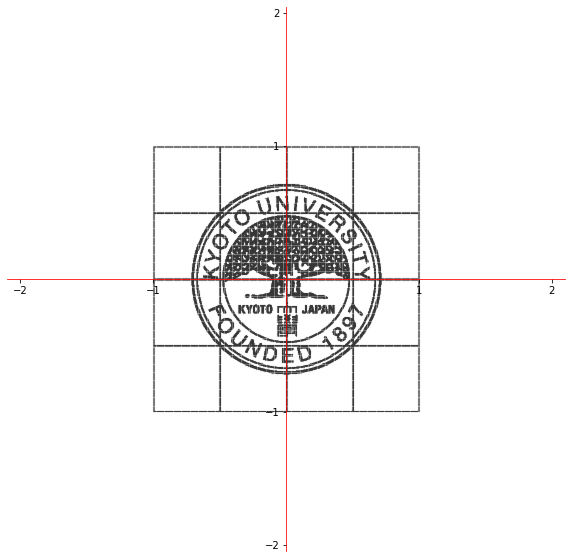

In [20]:
def showimage(image, size=2):
    """ image で与えられた点の集まりを全て plot した図を作る。size は描画する範囲が
    ([-size,size]x[-size,size])になるように指定。"""
    fig, ax = plt.subplots(figsize=(size*5,size*5))
    ax.set_aspect('equal', 'datalim') #x 軸と y 軸の目盛りを同じ幅にする。
    plt.scatter(*image, s=0.01, c="black")  # 0,01 は点のサイズ。
    
    #表示範囲の設定
    ax.set_ylim([-size-0.1,size+0.1])
    ax.set_xlim([-size-0.1, size+0.1])
    # 座標軸の設定(面倒だが、左と下ではなく、座標軸に数を入れるのに、他にいい方法はなさそう)
    for d in ['bottom', 'left']:
        ax.spines[d].set_position(('data', 0))
        ax.spines[d].set_color('red')
    ax.set_xticks([-2,-1,1, 2])
    ax.set_yticks([-2,-1,1, 2])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
#    plt.show()

  
showimage(image)

元の画像が白黒画像だったので，元と同じ画像が，[-1,1]x[-1,1] の範囲で作られていることが分かります。さて，image には黒い点の x座標, y 座標の列からなる配列がはいっています。
それに座標変換を行い，絵がどうなるか見てみましょう。
座標変換後の x座標, y 座標の列からなる配列を得るには，変換行列を左からかければいいはずです。

よって，次のようにして，行列で変換した点を表示できます。ここでは，a は，x 成分を2倍，y 成分はそのままという一次変換行列です。

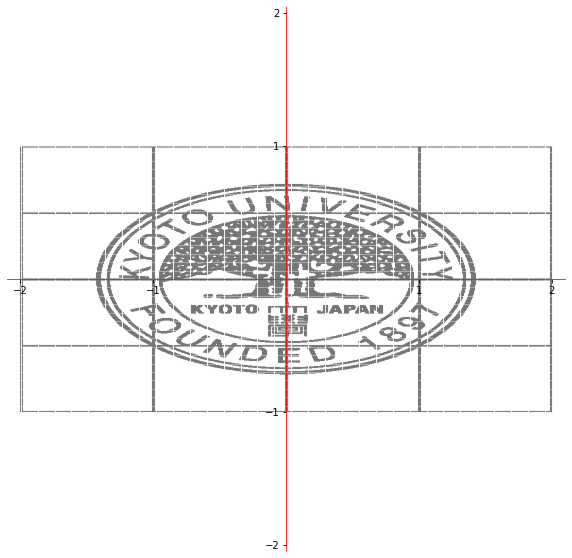

In [21]:
a = np.array([[2,0],[0,1]])
newfig = a@image
showimage(newfig)


**練習問題10** 与えられた t に対して，t だけの回転行列を返すメソッドを作ろう。それをかけることにより，image を回転させた絵を作成し，描画しよう。


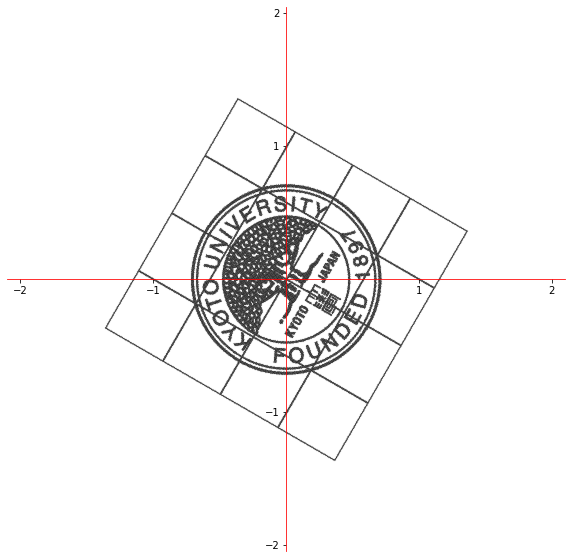

In [22]:
#練習問題10

def rotate(t):
    u = t * np.pi/180
    a = np.array([[np.sin(u),-np.cos(u)],[np.cos(u),np.sin(u)]])
    return a

showimage(rotate(30)@image)

**練習問題20** 行列 `[[a,b][c,d]]` による一次変換を行うと，(1,0) が (a,c), (0,1) が (b,d) に移ります。
そのことが分かるように，行列 v をもらい，その行列で image を一次変換した画像の上に，(a,c) および (b,d) に，赤および青の点をうった絵を描く，trans(v) を作ろう。
点は，matplotlib　の scatter 関数で打つことができる。また，matplotlib は，show を呼び出さないと、セルにある描画命令をまとめて実行してくれるので，showimage の後に，これを行えばよい。
showimage の第2引数で size を渡すと，描画範囲を [-size,size]x[-size,size] にできる。v をもとに，適切な値をshowimage にわたして，画像が画面内に収まるようにしよう。


trans を用いて、いろんな行列の一次変換の結果を描画しよう。

**練習問題30** 角度 30 の回転行列

**練習問題35** t = 30 とし、(cos(t), sin(t)) と原点を結ぶ直線に対する折り返し。(-t 度回転し、x 軸で折り返し、t 度すればよい。)
(-2cos(t),-2sin(t)) と (2cos(t), 2sin(t)) を結ぶ線分も描こう。2点 [x0,y0], [x1,y1] を結ぶ青色の線分で幅が3 のものは，

```plt.plot([x0,x1], [y0,y1], 'b-', lw=3) ```

で描くことができる。


**練習問題40**  A = [[1, 0.2],[0.5, 1]], A の 2乗，A の3乗。
行列 a の n 乗は，
```
np.linalg.matrix_power(a, n) 
```
で求まる。

**練習問題50**  A = [[1,0],[-0.5,1]],
A の 2乗，A の 3 乗。　　　

**練習問題60** 
trans を，固有値を表示し，固有値が実数の時には，原点を始点とする固有ベクトルも描画するように変更した，eigen(a) を作成しよう。x が実数かどうかは，type(x) == complex で調べることができる。上の練習問題のそれぞれの行列に対して新しい eigen を行い，固有値と固有ベクトルの意味を確認しよう。


**練習問題** 
最大の固有値に対応する固有ベクトルが X 軸に来るように、図形を回転させよう。

v=(0.49999999999999994+0.8660254037844388j), imag=0.8660254037844388


NameError: name 'flip' is not defined

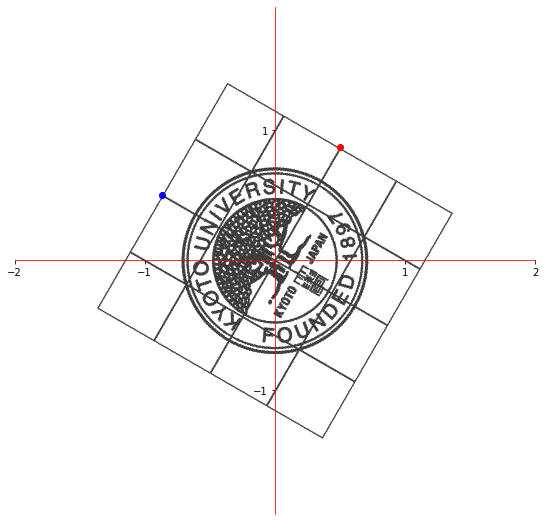

In [24]:
# 練習問題60-1

def eigen(a):
    showimage(a@image,a.max()+1)

    plt.scatter(a[0][0],a[1][0], c="red")
    plt.scatter(a[0][1],a[1][1], c="blue")
    v, w = np.linalg.eig(a)
    print(f"v={v[0]}, imag={(v[0]).imag}")
    if(v[0].imag == 0.0):
        print(f"v={v[0]}")    
        print(f"w={w}")
        plt.plot([0,w[0][0]],[0,w[1][0]], 'b-', lw=3)    
        plt.plot([0,w[0][1]],[0,w[1][1]], 'r-', lw=3)     

eigen(rotate(30))

# 練習問題60-2
eigen(flip(30))

# 練習問題60-3
a = np.array([[1,0.2],[0.5,1]])
eigen(a)
eigen(np.linalg.matrix_power(a, 2))
eigen(np.linalg.matrix_power(a, 3))

# 練習問題60-4
a = np.array([[1,0],[-0.5,1]])
eigen(a)
eigen(np.linalg.matrix_power(a, 2))
eigen(np.linalg.matrix_power(a, 3))

[1. 1.]
[[0.0000000e+00 4.4408921e-16]
 [1.0000000e+00 1.0000000e+00]]
<class 'numpy.float64'>


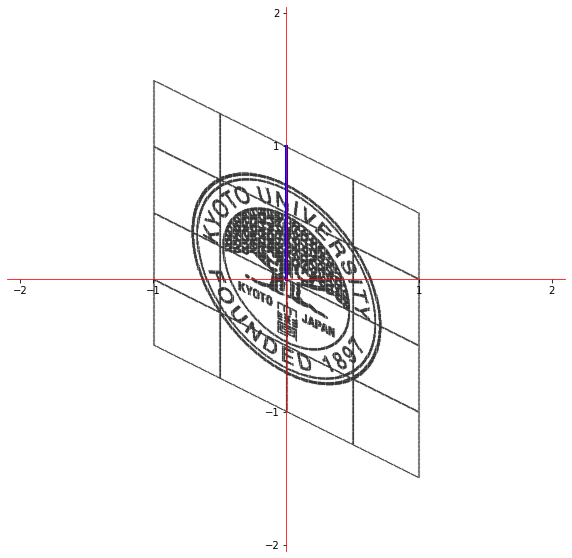

In [25]:
a = np.array([[1,0],[-0.5,1]])
#a = np.array([[2,5],[-3,8]])
showimage(a@image)
v, w = np.linalg.eig(a)
print(v)
print(w)
print(type(v[0]))
plt.plot([0,0],[w[0][0],w[1][0]], 'b-', lw=3) 
plt.plot([0,0],[w[0][1],w[1][1]], 'b-', lw=3) 

In [26]:
w[0][1]+ 1

1.0000000000000004

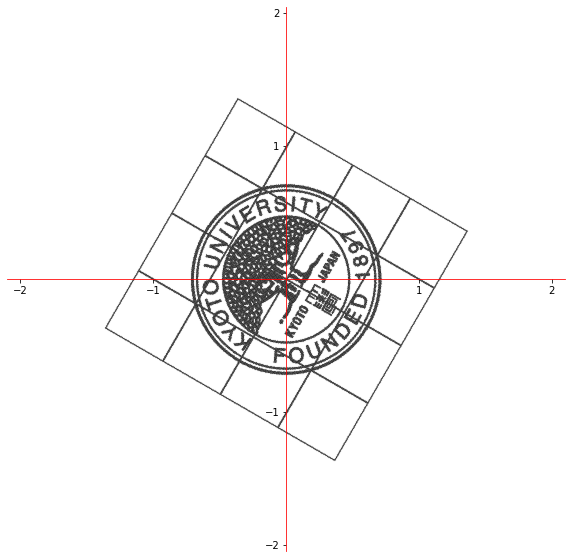

In [29]:
showimage(rotate(30)@image)

**練習問題** (xx, yy) をもらい，xx, yy だけ平行移動を行うにはどうすればよいか考えましょう。
それは，(x, y) の代わりに (x, y, 1) を考えて，　
`[[1,0,xx],[0,1,yy]]` という行列との掛け算をすればよいはずです。figx の長さは，
`figx.shape[0]` でとって来れます。また，[1,1,1...,1] という大きさ n のリストは [1]*n　でできます。

In [35]:
def trans(xx,yy):
    return np.array([[1,0,xx],[0,1,yy]])
showimage(*trans(0.2,0.5)@np.array([image[0],image[1],[1]*(imagex.shape[0])]))

ValueError: setting an array element with a sequence.

## 複素数

In [38]:
imagex = np.array([x for (x,y) in original])
imagey = np.array([y for (x,y) in original])
imagec = np.array([complex(x,y) for (x,y) in zip(imagex, imagey)])

array([-1.   +1.j   , -0.996+1.j   , -0.992+1.j   , ...,  0.988-0.996j,
        0.992-0.996j,  0.996-0.996j])

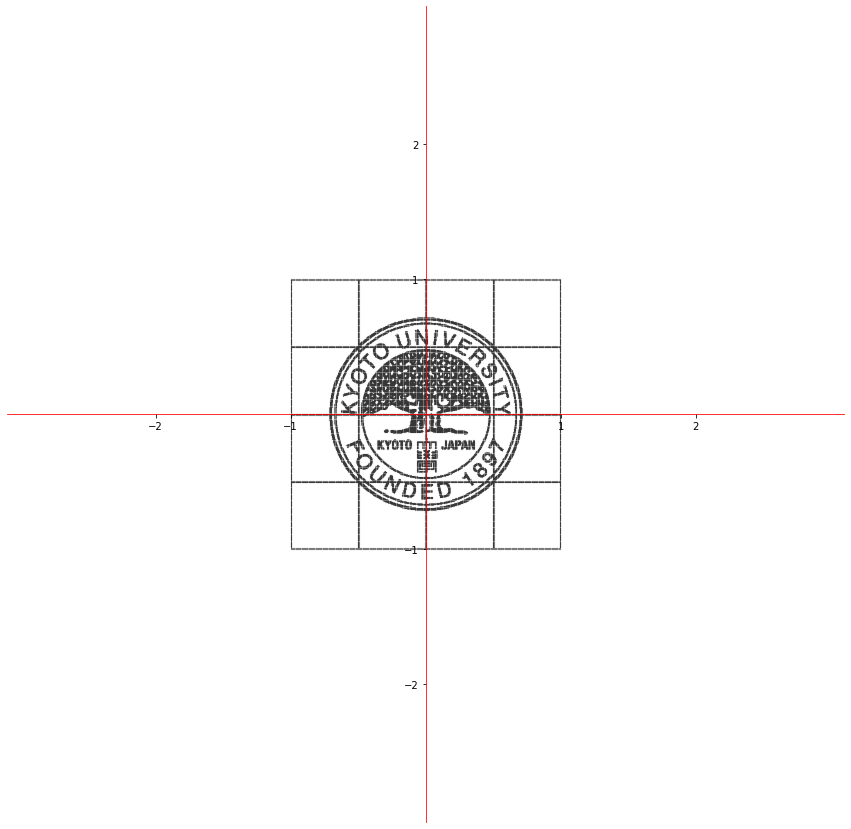

In [54]:
def showcimage(cimage, size=2):
    """ image で与えられた点の集まりを全て plot した図を作る。size は描画する範囲が
    ([-size,size]x[-size,size])になるように指定。"""
    fig, ax = plt.subplots(figsize=(size*5,size*5))
    ax.set_aspect('equal', 'datalim') #x 軸と y 軸の目盛りを同じ幅にする。
    plt.scatter([x.real for x in cimage], [x.imag for x in cimage], s=0.01, c="black")  # 0,01 は点のサイズ。
    
    #表示範囲の設定
    ax.set_ylim([-size-0.1,size+0.1])
    ax.set_xlim([-size-0.1, size+0.1])
    # 座標軸の設定(面倒だが、左と下ではなく、座標軸に数を入れるのに、他にいい方法はなさそう)
    for d in ['bottom', 'left']:
        ax.spines[d].set_position(('data', 0))
        ax.spines[d].set_color('red')
    ax.set_xticks([-2,-1,1, 2])
    ax.set_yticks([-2,-1,1, 2])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
#    plt.show()

showcimage(imagec, 3)  


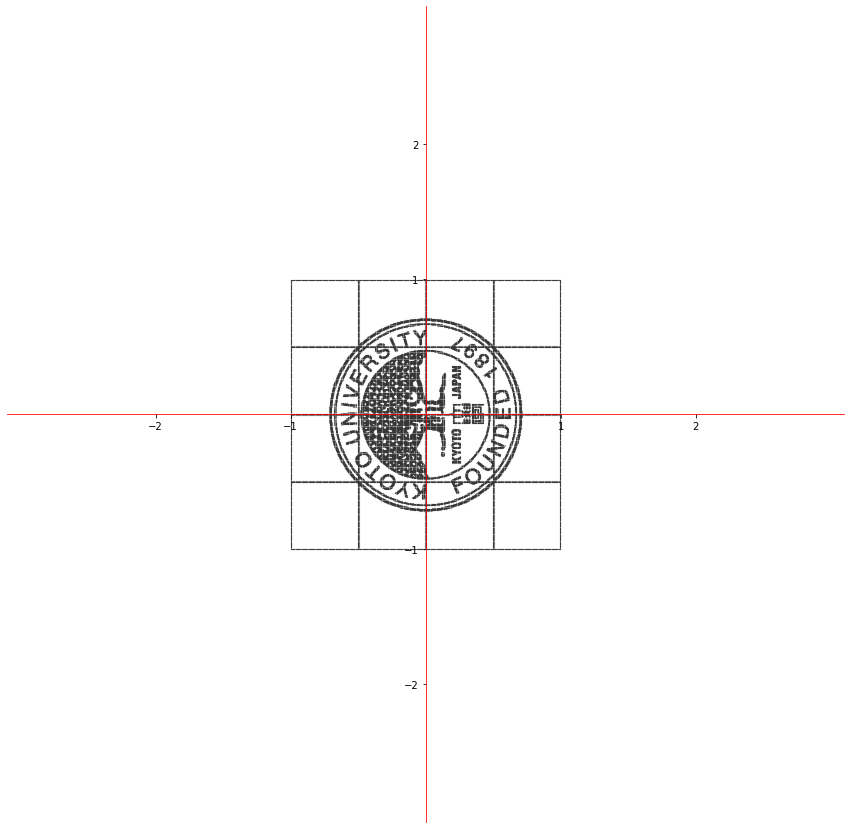

In [67]:
showcimage(imagec*1j, 3)  


/Users/tsuiki/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/Users/tsuiki/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


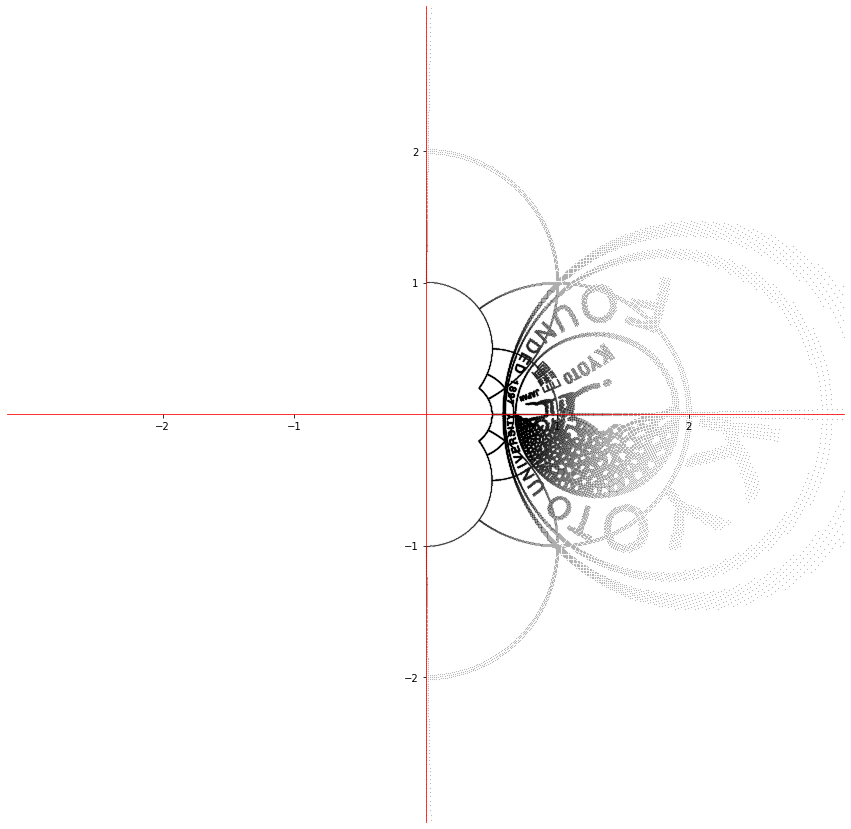

In [68]:
showcimage(1/(1+imagec), 3)  

/Users/tsuiki/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/Users/tsuiki/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


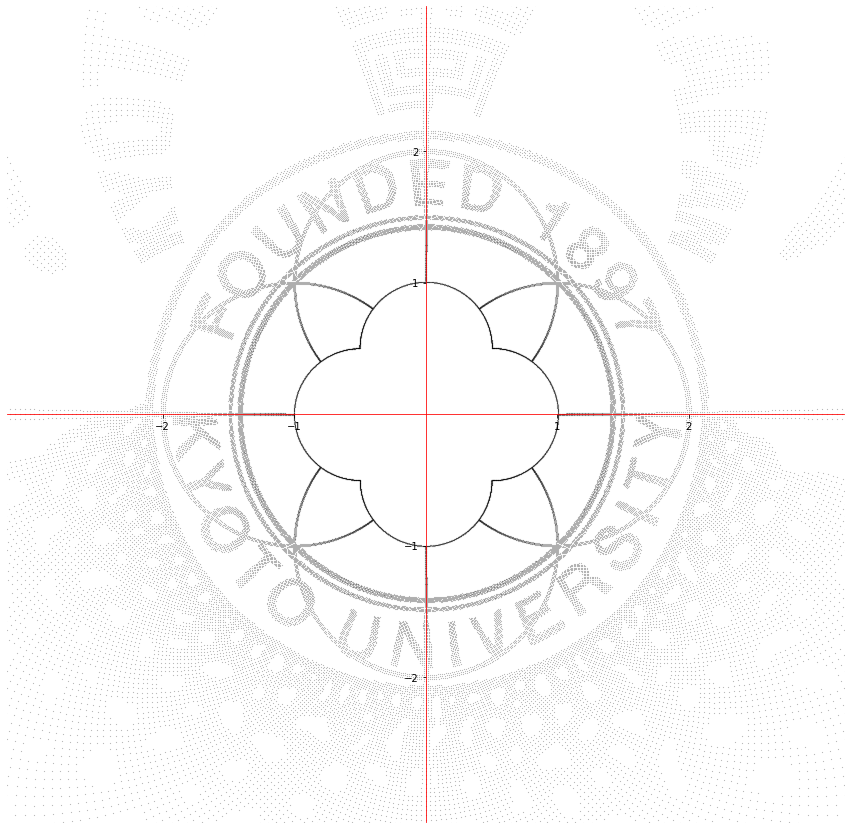

In [55]:
showcimage(1/imagec, 3) 

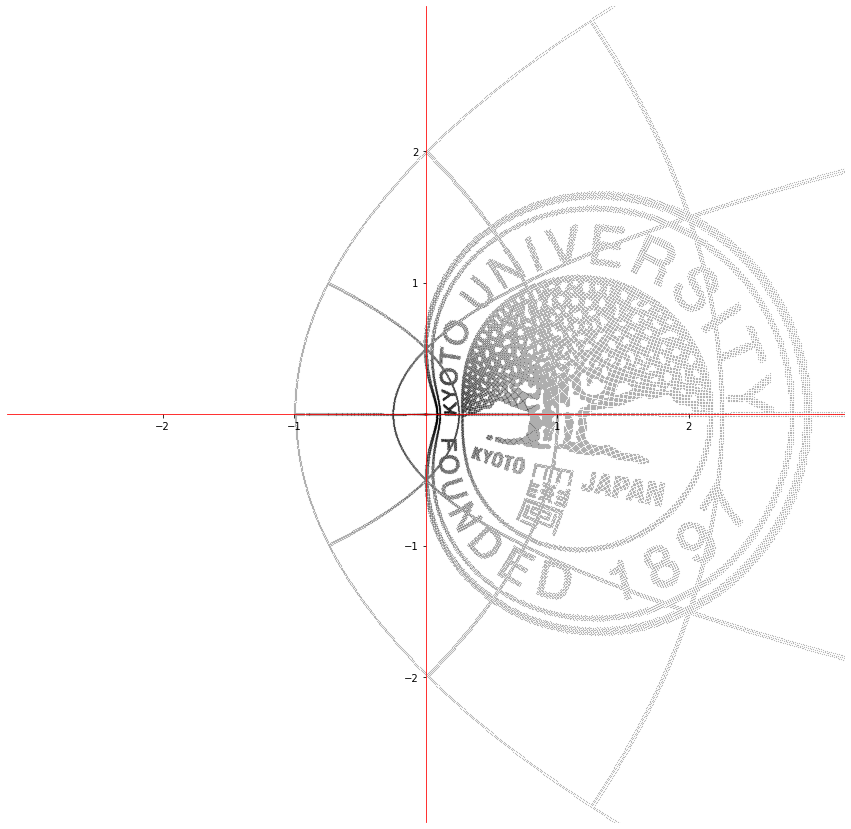

In [75]:
showcimage((1+imagec) * (1+imagec), 3) 

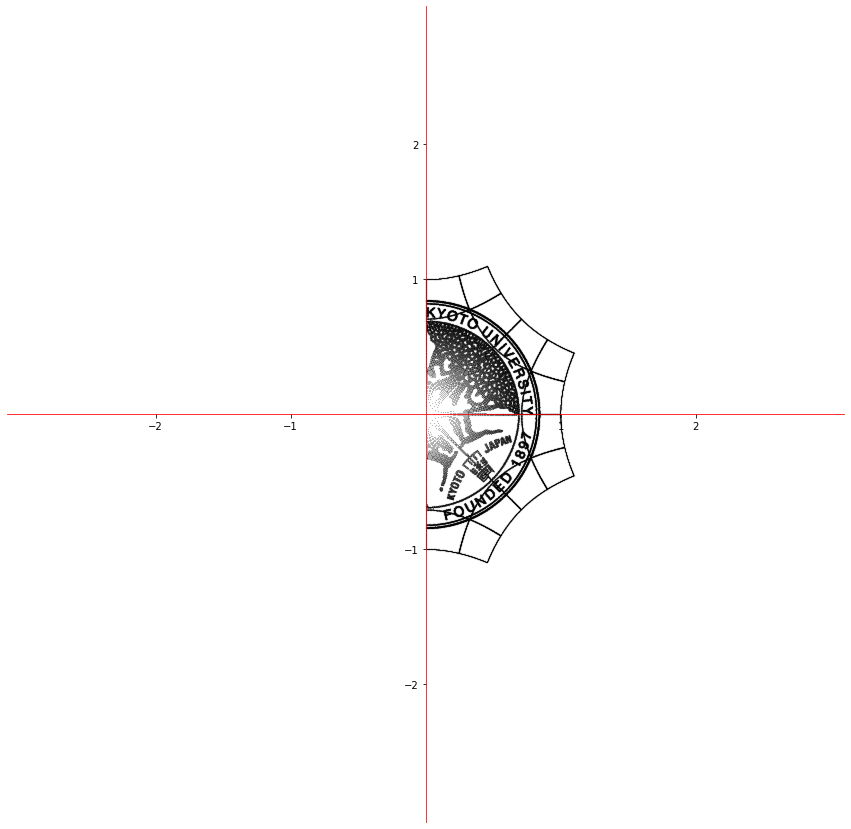

In [63]:
import cmath
showcimage([cmath.sqrt(x) for x in imagec], 3) 

/Users/tsuiki/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/Users/tsuiki/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


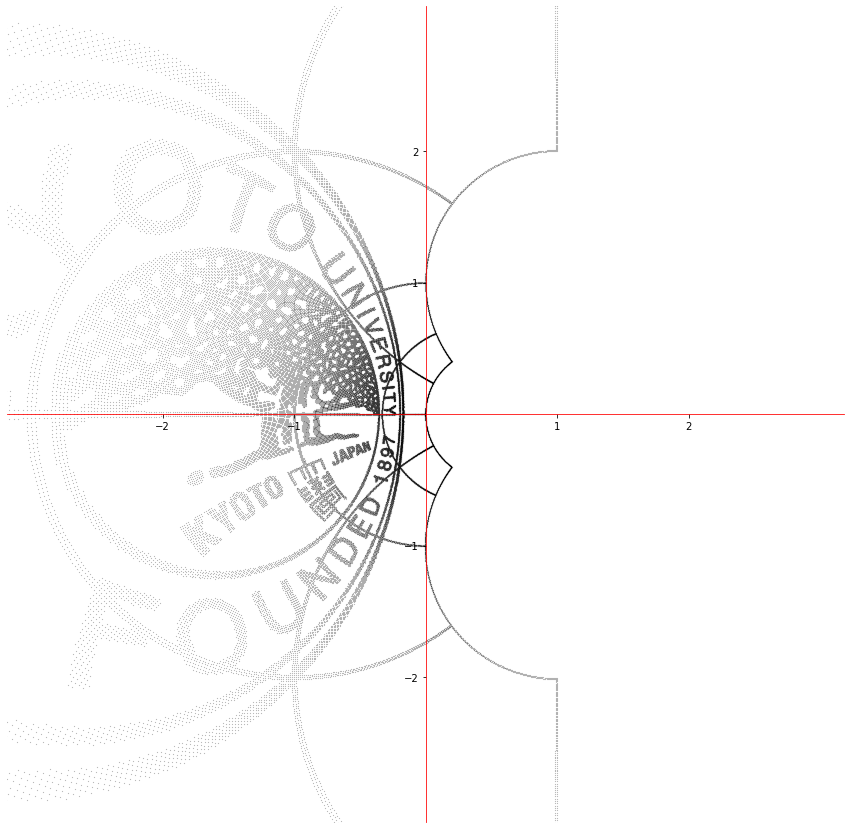

In [65]:
showcimage((imagec-1)/(imagec+1), 3) 

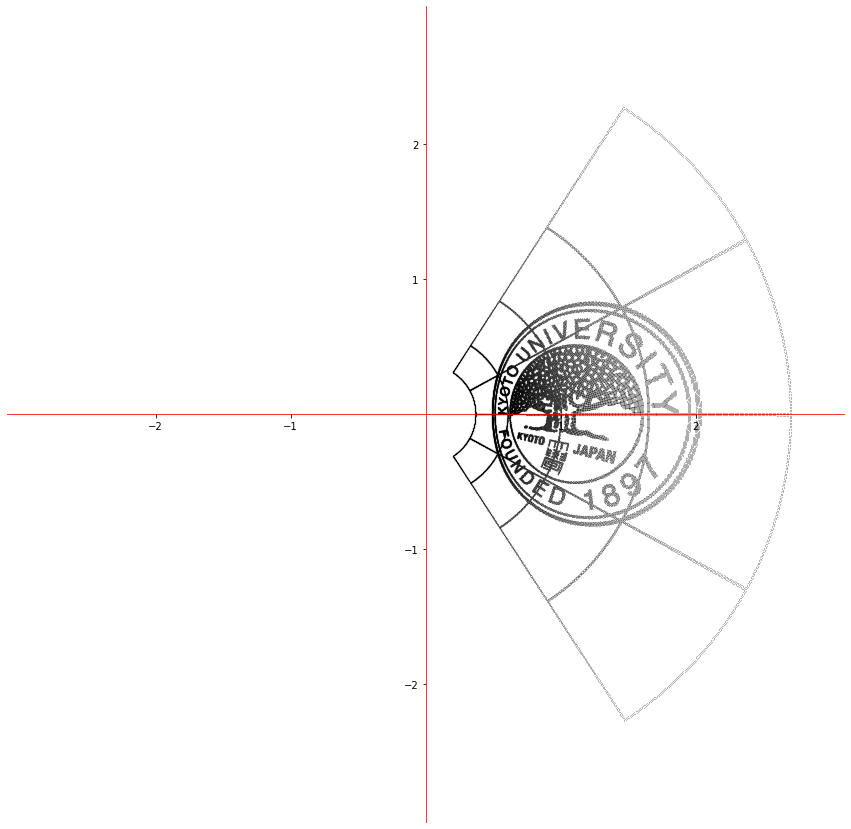

In [74]:
showcimage([cmath.exp(x) for x in imagec], 3)  

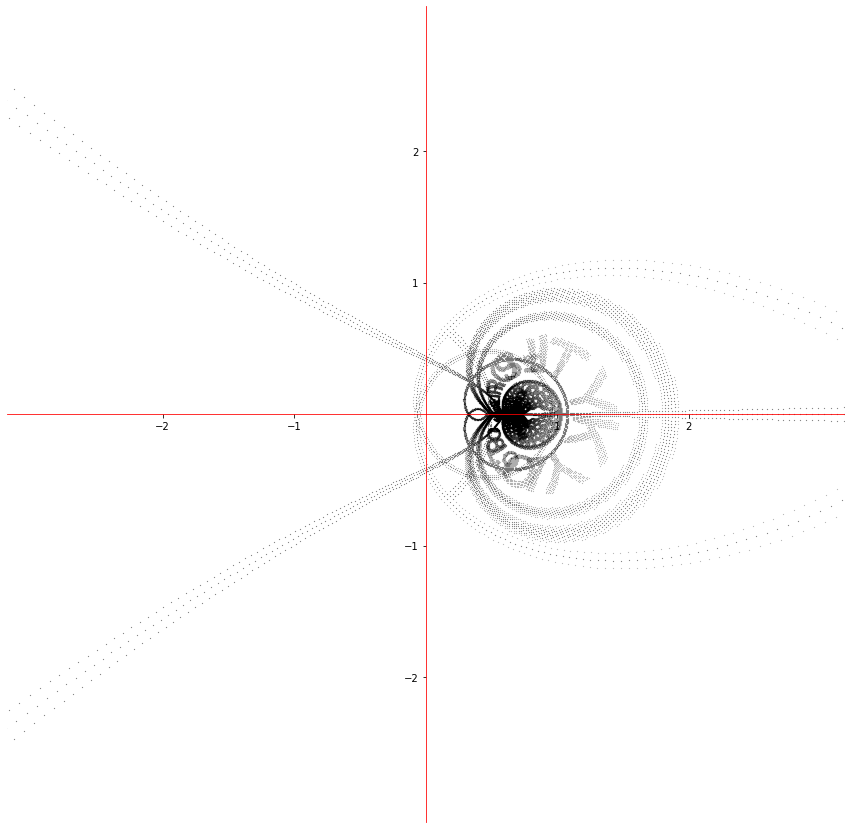

In [90]:
def repeat(n, f):
    def repeatit(n, f, x):
        for i in range(n):
            x = f(x)
        return x
    return lambda y: repeatit(n, f, y)

showcimage([repeat(3, lambda x:x*x+0.4)(x) for x in imagec], 3)  